### tokenize the text 

In [3]:
def tokenize(text):
    return text.split(" ")

In [4]:
text = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley"
print(tokenize(text))

['In', 'a', 'shocking', 'finding,', 'scientist', 'discovered', 'a', 'herd', 'of', 'unicorns', 'living', 'in', 'a', 'remote,', 'previously', 'unexplored', 'valley']


In [7]:
import numpy as np
a_py = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a_np = np.array(a_py)
a_np

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Broadcasting
When Numpy is asked to perform an operation between arrays of differents sizes, it "broadcasts" the smaller one to the bigger one.

In [8]:
a = np.array([4, 5, 6])
b = np.array([2, 2, 2])
a * b

array([ 8, 10, 12])

In [9]:
a = np.array([4, 5, 6])
b = 2
a * b

array([ 8, 10, 12])

In [10]:
a = np.arange(10).reshape(1,10)
b = np.arange(12).reshape(12,1)
print(a)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [11]:
a*b

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81],
       [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 0, 11, 22, 33, 44, 55, 66, 77, 88, 99]])

## Matplotlib

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.rcParams['figure.figsize'] = [10, 7]

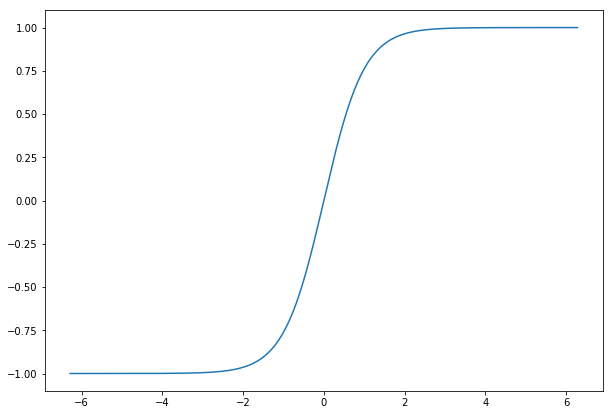

In [15]:
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.tanh(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

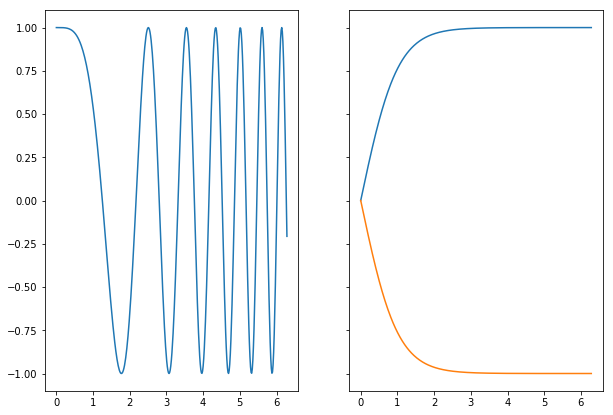

In [16]:
x = np.linspace(0, 2*np.pi, 400)
y1 = np.tanh(x)
y2 = np.cos(x**2)
fig, axes = plt.subplots(1, 2, sharey=True)
axes[1].plot(x, y1)
axes[1].plot(x, -y1)
axes[0].plot(x, y2)
plt.show()

## Scikit-learn (read this after you have completed unit 1)

In [17]:
from sklearn.datasets import make_blobs

In [18]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]), array([0, 0, 0, 1, 1]))

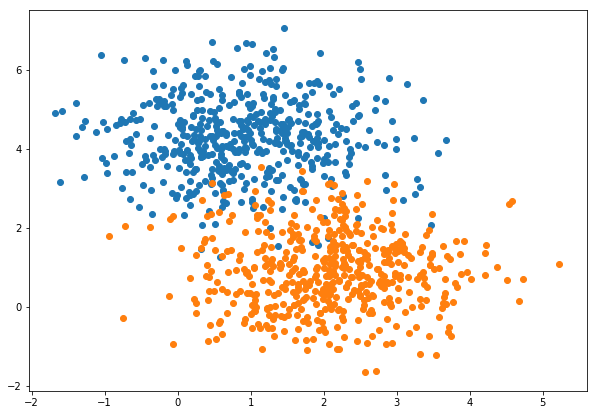

In [19]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

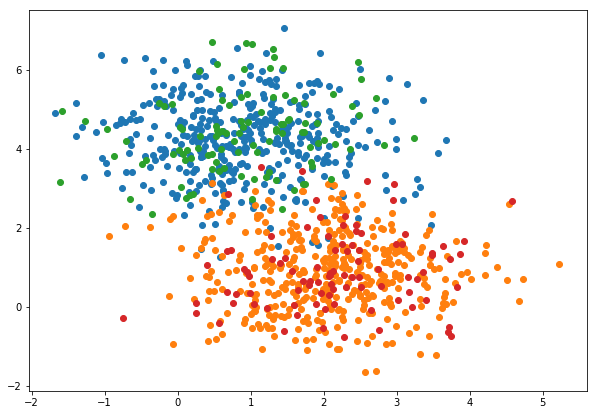

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

In [21]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [22]:
clf = Perceptron(max_iter=40, random_state=0)
# clf = LinearSVC(max_iter=40, random_state=0)

In [23]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Test accuracy: 0.9550


In [24]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

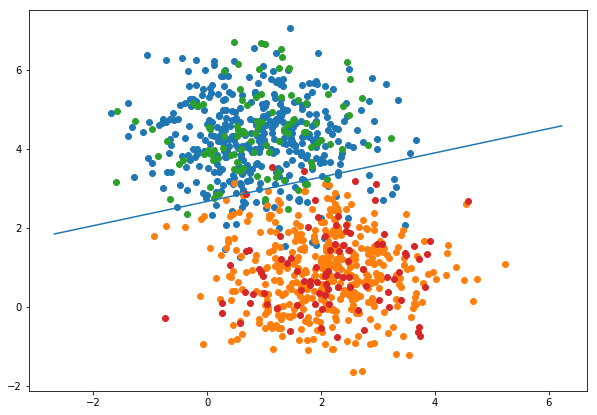

In [29]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])
x_bnd = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1,  400)
y_bnd = - x_bnd * (theta[0] /theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)
plt.show()

## Another toy example

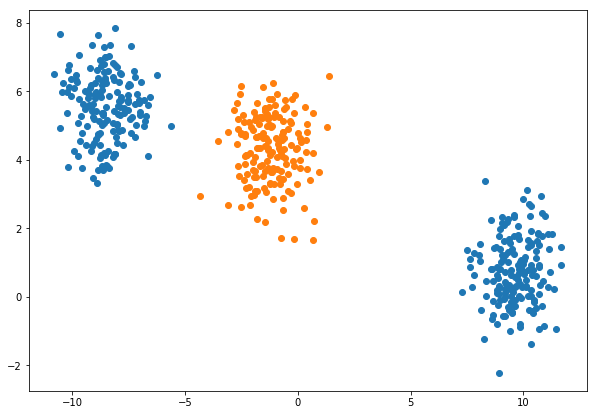

In [30]:
X, y = make_blobs(n_samples=500, centers=3, random_state=7)
y[y==2] = 0
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.svm import SVC
# clf = SVC(kernel="linear", random_state=0)
clf = SVC(kernel="rbf", random_state=0)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

Test accuracy: 1.0000


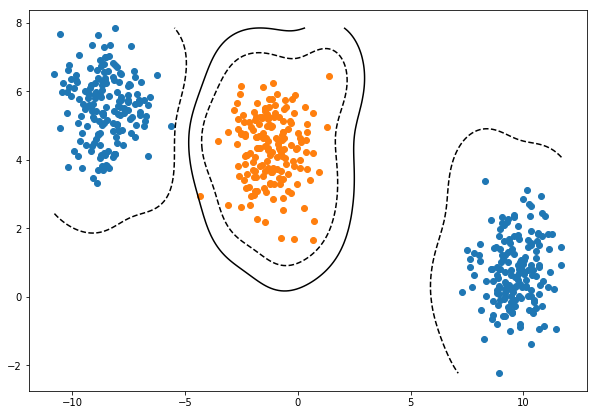

In [34]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])
    
Z = Z.reshape(XX.shape)
ax.contour(XX, YY, Z, colors="black",
    linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

# Classify digits

In [35]:
from sklearn.datasets import load_digits

In [36]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

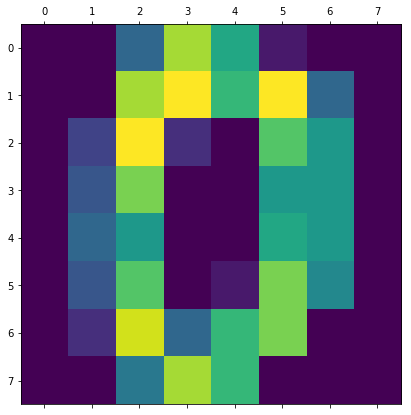

In [38]:
fig, ax = plt.subplots()
ax.matshow(digits.images[0])
plt.show()

In [39]:
X_train.shape

(1437, 64)

In [40]:
clf = Perceptron(max_iter=40, random_state=0)

In [41]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9389


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [42]:
clf = LinearSVC(C=1, random_state=0)

In [43]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9361


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, clf.predict(X_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  1,  0,  5,  0],
       [ 0,  1, 33,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 38,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  2, 36]])

# Cross validation and Grid search 

In [48]:
clf = LinearSVC(C=1, random_state=0)
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean: 0.9443, Std: 0.0127


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
clf = LinearSVC(C=0.1, random_state=0)
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean: 0.9555, Std: 0.0101


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
from sklearn.model_selection import GridSearchCV
clf = LinearSVC(random_state=0)
param_grid = {'C': 10. ** np.arange(-6, 4)}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=3, return_train_score=True)
grid_search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8424657534246576, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8719723183391004, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.9090909090909091, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8426573426573427, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................. C=1e-06, score=0.897887323943662, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ................ C=1e-05, score=0.9075342465753424, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.001, score=0.958904109589041, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................ C=0.001, score=0.9653979238754326, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................. C=0.001, score=0.965034965034965, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................. C=0.001, score=0.965034965034965, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................ C=0.001, score=0.9788732394366197, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9554794520547946, total=   0.1s
[CV] C=0.01 ..........................................................


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=0.01, score=0.9619377162629758, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9685314685314685, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9615384615384616, total=   0.1s
[CV] C=0.01 ..........................................................


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=0.01, score=0.971830985915493, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9452054794520548, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ................... C=0.1, score=0.972318339100346, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9475524475524476, total=   0.1s
[CV] C=0.1 ...........................................................


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=0.1, score=0.9615384615384616, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9507042253521126, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9417808219178082, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9619377162629758, total=   0.1s
[CV] C=1.0 ...........................................................


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=1.0, score=0.9370629370629371, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9545454545454546, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] ................... C=1.0, score=0.926056338028169, total=   0.1s
[CV] C=10.0 ..........................................................
[CV] ................. C=10.0, score=0.9383561643835616, total=   0.1s
[CV] C=10.0 ..........................................................


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=10.0, score=0.9653979238754326, total=   0.1s
[CV] C=10.0 ..........................................................
[CV] ................. C=10.0, score=0.9335664335664335, total=   0.1s
[CV] C=10.0 ..........................................................
[CV] .................. C=10.0, score=0.951048951048951, total=   0.1s
[CV] C=10.0 ..........................................................
[CV] .................. C=10.0, score=0.954225352112676, total=   0.1s
[CV] C=100.0 .........................................................


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=100.0, score=0.928082191780822, total=   0.1s
[CV] C=100.0 .........................................................
[CV] ................ C=100.0, score=0.9446366782006921, total=   0.1s
[CV] C=100.0 .........................................................
[CV] ................ C=100.0, score=0.9335664335664335, total=   0.1s
[CV] C=100.0 .........................................................
[CV] ................ C=100.0, score=0.9475524475524476, total=   0.1s
[CV] C=100.0 .........................................................


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=100.0, score=0.9401408450704225, total=   0.1s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9383561643835616, total=   0.1s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9550173010380623, total=   0.1s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9300699300699301, total=   0.1s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9545454545454546, total=   0.1s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9436619718309859, total=   0.1s


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.2s finished
